In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# General Information about the dataset

Dataset from https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities.

In [2]:
data = pd.read_csv('kaggle/input/daily-temperature-of-major-cities/city_temperature.csv')
#original_data = pd.read_csv('/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv')
data.head()

c:\Users\Mingel\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


# Data Cleaning

From this information alone, we can already perform some data cleaning:
- Because we are dealing with time series, we can remove duplicate rows.

In [4]:
print("Number of Duplicates: ", data.duplicated(keep='first').sum())

Number of Duplicates:  20715


In [5]:
data.drop_duplicates(keep='last', inplace=True)
data.reset_index(drop=True, inplace=True)

More information about the dataset:

In [6]:
data.describe()

,Month,Day,Year,AvgTemperature
count,2.885612e+06,2.885612e+06,2.885612e+06,2.885612e+06
mean,6.469037e+00,1.571679e+01,2.006707e+03,5.601560e+01
std,3.456445e+00,8.800516e+00,1.965710e+01,3.215210e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.560000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


Taking notes from this table which are weird/do not make sense:
- The "earliest" `Day` is 0. 
- The "earliest" `Year` is 200.
- Assuming the temperature is measured in Celsius, a temperature of -50°C minimum or 110°C maximum does not make sense.

Let's look at the temperature first by inspecting the distribution of the average temperature.


Bad key text.latex.unicode in file c:\Users\Mingel\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file c:\Users\Mingel\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\Mingel\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 157 ('mathtext.

<AxesSubplot:>

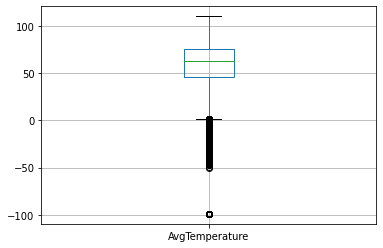

In [7]:
pd.DataFrame(data['AvgTemperature'], columns=['AvgTemperature']).boxplot()

These values seemed too high at first, then I suspected that the given unit for the temperature is in Fahrenheit. As I am more familiar with Celcius, let's convert them to Celsius:

<AxesSubplot:>

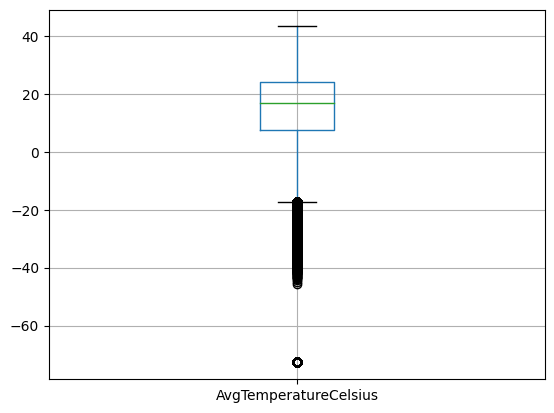

In [8]:
data['AvgTemperatureCelsius'] = (data['AvgTemperature'] - 32) * (5/9) 
pd.DataFrame(data['AvgTemperatureCelsius'], columns=['AvgTemperatureCelsius']).boxplot()

In [9]:
# drop fahrenheit column
data.drop(['AvgTemperature'], axis=1, inplace=True)

There is an outlier, which has an average temperature of lower than -60°C. It should be checked if that value makes sense.

In [10]:
data[data.AvgTemperatureCelsius == data.AvgTemperatureCelsius.min()]

,Region,Country,State,City,Month,Day,Year,AvgTemperatureCelsius
220,Africa,Algeria,NaN,Algiers,8,9,1995,-72.777778
221,Africa,Algeria,NaN,Algiers,8,10,1995,-72.777778
408,Africa,Algeria,NaN,Algiers,2,13,1996,-72.777778
409,Africa,Algeria,NaN,Algiers,2,14,1996,-72.777778
1453,Africa,Algeria,NaN,Algiers,12,24,1998,-72.777778
...,...,...,...,...,...,...,...,...
2884756,North America,US,Additional Territories,San Juan Puerto Rico,3,29,2011,-72.777778
2884819,North America,US,Additional Territories,San Juan Puerto Rico,5,31,2011,-72.777778
2884974,North America,US,Additional Territories,San Juan Puerto Rico,11,2,2011,-72.777778
2885011,North America,US,Additional Territories,San Juan Puerto Rico,12,9,2011,-72.777778


Looking from that result, it seems that that value of -99°F (-72.7°C) is a default value for a missing value. So from now on, it makes sense to remove those value and interpolate them.

In [11]:
data.loc[data.AvgTemperatureCelsius == data.AvgTemperatureCelsius.min(),'AvgTemperatureCelsius'] = np.nan

Now onto the date.

In [12]:
# swap columns 'Day' and 'Month'
i = list(data.columns)
a, b = i.index('Day'), i.index('Month')
i[b], i[a] = i[a], i[b]
data = data[i]

<AxesSubplot:>

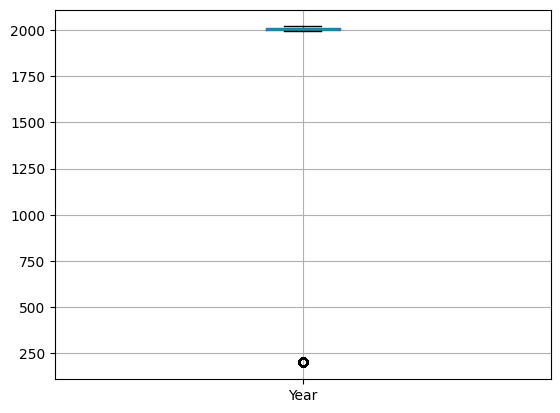

In [13]:
pd.DataFrame(data['Year'], columns=['Year']).boxplot()

In [14]:
print("Corrupted years: ", data[data.Year < 250]['Year'].unique())

Corrupted years:  [201 200]


In [15]:
data[data['Year'] <= 201].index

Int64Index([  58178,   58179,   58180,   58181,   58182,   58183,   58184,
              58185,   58186,   58187,
            ...
            1210238, 1210239, 1210240, 1210241, 1210242, 1210243, 1210244,
            1210245, 1210246, 1210247],
           dtype='int64', length=295)

Before removing rows containing the corrupted year, let's sort by city and date first:

In [16]:
data.sort_values(by=['City', 'Year', 'Month', 'Day'], inplace=True)
data.reset_index(inplace=True)

In [17]:
def split_index_ranges(index_arr):
    split = []
    index_lst = []
    for i in range(len(index_arr)):
        if i > 0 and index_arr[i - 1] + 1 == index_arr[i]:
            index_lst.append(index_arr[i])
        else:
            if i > 0:
                split.append(index_lst)
            index_lst = []
            index_lst.append(index_arr[i])
    if len(index_lst) > 0:
        split.append(index_lst)
    return split

In [18]:
wrong_year_index_lists = split_index_ranges(data[data['Year'] <= 201].index.to_list())

In [19]:
print("Number of \"corrupt\" rows: ", len(data[data['Year'] <= 201].index), "/", data[data['Year'] <= 201]['AvgTemperatureCelsius'].isna().sum())

Number of "corrupt" rows:  295 / 295


It seems like we can safely delete these invalid rows (due to the rows being sorted by date).

In [20]:
data.drop(data[data['Year'] <= 201].index, inplace=True)

In [21]:
datetime_df = pd.DataFrame( {"DateTime": pd.to_datetime(data[['Day','Month','Year']],errors='coerce')} )

In [22]:
datetime_df

,DateTime
0,1995-01-01
1,1995-01-02
2,1995-01-03
3,1995-01-04
4,1995-01-05
...,...
2885607,2020-05-09
2885608,2020-05-10
2885609,2020-05-11
2885610,2020-05-12


In [23]:
data = data.loc[:, ~data.columns.isin(['Day', 'Month', 'Year'])].join(datetime_df["DateTime"])

Drop (for the data analysis) remaining unnessary columns:

In [24]:
data.drop(['index'], axis=1, inplace=True)

Deal with NaN average temperatures:

In [25]:
data['AvgTemperatureCelsius'].isna().sum()

78948

Remove duplicates excluding `AvgTemperatureCelsius`:

In [26]:
index_dupes = data.duplicated(subset=['Region','Country','State','City','DateTime'], keep=False)
data[index_dupes][0:50]

,Region,Country,State,City,AvgTemperatureCelsius,DateTime
7668,Africa,Ivory Coast,NaN,Abidjan,26.666667,2015-12-30
7669,Africa,Ivory Coast,NaN,Abidjan,NaN,2015-12-30
16934,North America,US,Texas,Abilene,1.222222,2015-12-30
16935,North America,US,Texas,Abilene,NaN,2015-12-30
26200,Middle East,United Arab Emirates,NaN,Abu Dhabi,20.500000,2015-12-30
26201,Middle East,United Arab Emirates,NaN,Abu Dhabi,NaN,2015-12-30
35130,Africa,Ethiopia,NaN,Addis Ababa,17.777778,2014-12-30
35131,Africa,Ethiopia,NaN,Addis Ababa,NaN,2014-12-30
35496,Africa,Ethiopia,NaN,Addis Ababa,17.611111,2015-12-30
35497,Africa,Ethiopia,NaN,Addis Ababa,NaN,2015-12-30


We can see that the lastest entry of the duplicates have no temperature recorded. So we can remove them:

In [27]:
data.drop_duplicates(subset=['Region','Country','State','City','DateTime'], keep='first', inplace=True)
data.reset_index(inplace=True,drop=True)

Interpolate linearly.

In [28]:
data.reset_index(drop=True, inplace=True)
for city in data['City'].unique():
    if data[data.City == city]['AvgTemperatureCelsius'].isna().sum() > 0:
        interpolated_vals = data[data.City == city]['AvgTemperatureCelsius'].interpolate()
        data.loc[interpolated_vals.index, 'AvgTemperatureCelsius'] = interpolated_vals.to_numpy()
        #if interpolated_vals.isna().sum() > 0:
        #    interpolated_vals = data[data.City == city]['AvgTemperatureCelsius'].interpolate(method="spline", order=1, limit_direction="both")  # extrapolate by forward/backward filling 
        #    data.loc[interpolated_vals.index, 'AvgTemperatureCelsius'] = interpolated_vals.to_numpy()
    print("Processed:", city)

Processed: Abidjan
Processed: Abilene
Processed: Abu Dhabi
Processed: Addis Ababa
Processed: Akron Canton
Processed: Albany
Processed: Albuquerque
Processed: Algiers
Processed: Allentown
Processed: Almaty
Processed: Amarillo
Processed: Amman
Processed: Amsterdam
Processed: Anchorage
Processed: Ankara
Processed: Antananarivo
Processed: Ashabad
Processed: Asheville
Processed: Athens
Processed: Atlanta
Processed: Atlantic City
Processed: Auckland
Processed: Austin
Processed: Baltimore
Processed: Bangkok
Processed: Bangui
Processed: Banjul
Processed: Barcelona
Processed: Baton Rouge
Processed: Beijing
Processed: Beirut
Processed: Belfast
Processed: Belgrade
Processed: Belize City
Processed: Bern
Processed: Bilbao
Processed: Billings
Processed: Birmingham
Processed: Bishkek
Processed: Bismarck
Processed: Bissau
Processed: Bogota
Processed: Boise
Processed: Bombay (Mumbai)
Processed: Bonn
Processed: Bordeaux
Processed: Boston
Processed: Brasilia
Processed: Bratislava
Processed: Brazzaville
P

In [29]:
data['AvgTemperatureCelsius'].isna().sum()

2865

Because the interpolation does not predict values for values before and after the first and last non-NAN value appear, respectively, and therefore these values stay, we will drop all NAN values in the `AvgTemperatureCelsius` column.

In [30]:
data.dropna(subset=['AvgTemperatureCelsius'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [31]:
data['AvgTemperatureCelsius'].isna().sum()

0

-------------------------------


# Data Analysis

Let's check the temperature history for Munich! We will plot the average temperature per year, since plotting for every day or even month, we will only see oscillations that makes the plot hard to read.

In [32]:
data_munich = data[(data.City == 'Munich')]
data_munich = data_munich.drop(['Region','Country','State','City'], axis=1)
data_munich.loc[:, 'DateTime'] = data['DateTime'].dt.to_period('Y')
data_munich = data_munich.groupby('DateTime', as_index=False).mean()
data_munich['DateTime'] = data_munich['DateTime'].astype(str)
data_munich['DateTime'] = pd.to_datetime(data_munich['DateTime'])

<AxesSubplot:xlabel='DateTime', ylabel='AvgTemperatureCelsius'>

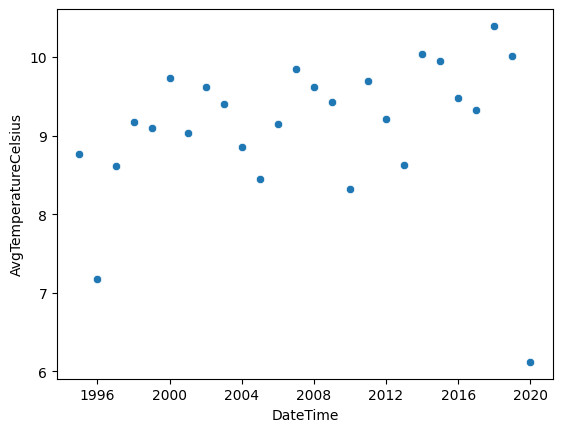

In [33]:
import seaborn as sns
sns.scatterplot(data=data_munich, x='DateTime', y='AvgTemperatureCelsius')

Let's plot a line through the data to see how much the temperature will actually increase over time.

Text(0, 0.5, 'Average temperature in °C')

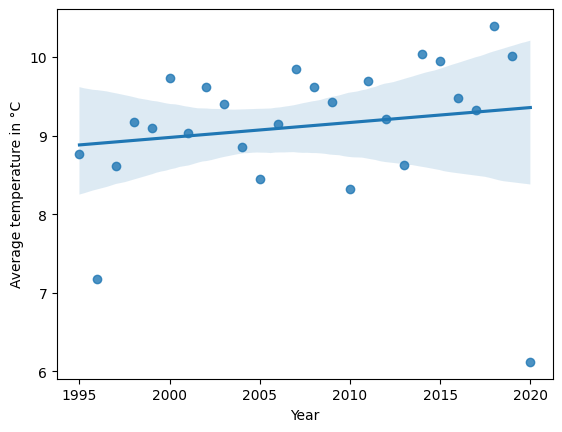

In [34]:
# with linear regression line
ax = sns.regplot(x=data_munich['DateTime'].dt.to_period('Y').apply(pd.to_numeric) + 1970, y=data_munich['AvgTemperatureCelsius'])
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature in °C')

How much do we expect the average temperature per year?

In [35]:
from sklearn.linear_model import LinearRegression
import datetime as dt

X = (data_munich['DateTime'].dt.to_period('Y').apply(pd.to_numeric) + 1970).values.reshape(-1, 1)
y = data_munich['AvgTemperatureCelsius'].values
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
print("The average temperature per year is increasing by", str(linear_regressor.coef_[0])[:5], "degrees in Munich!")

The average temperature per year is increasing by 0.019 degrees in Munich!


Now let's check Abidjan.

In [36]:
data_abidjan = data[(data.City == 'Abidjan')]
data_abidjan = data_abidjan.drop(['Region','Country','State','City'], axis=1)
data_abidjan.loc[:, 'DateTime'] = data['DateTime'].dt.to_period('Y')
data_abidjan = data_abidjan.groupby('DateTime', as_index=False).mean()
data_abidjan['DateTime'] = data_abidjan['DateTime'].astype(str)
data_abidjan['DateTime'] = pd.to_datetime(data_abidjan['DateTime'])

Text(0, 0.5, 'Average temperature in °C')

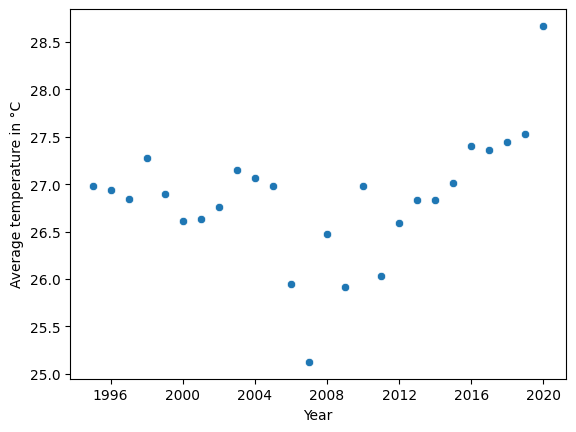

In [37]:
ax = sns.scatterplot(x=data_abidjan['DateTime'], y=data_abidjan['AvgTemperatureCelsius'])
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature in °C')

Text(0, 0.5, 'Average temperature in °C')

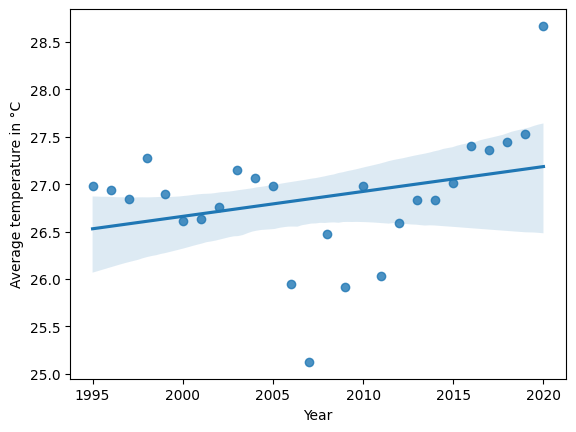

In [38]:
# with linear regression line
ax = sns.regplot(x=data_abidjan['DateTime'].dt.to_period('Y').apply(pd.to_numeric) + 1970, y=data_abidjan['AvgTemperatureCelsius'])
ax.set_xlabel('Year')
ax.set_ylabel('Average temperature in °C')

In [39]:
X = (data_abidjan['DateTime'].dt.to_period('Y').apply(pd.to_numeric) + 1970).values.reshape(-1, 1)
y = data_abidjan['AvgTemperatureCelsius'].values
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
print("The average temperature per year is increasing by", str(linear_regressor.coef_[0])[:5], "degrees in Abidjan!")

The average temperature per year is increasing by 0.026 degrees in Abidjan!


Let's check the general temperature increase for every major city in our database:

In [40]:
city_lst = []
temp_increase_lst = []
for city in data['City'].unique():
    data_city = data[(data.City == city)]
    data_city = data_city.drop(['Region','Country','State','City'], axis=1)
    
    if not data_city.empty:
        data_city.loc[:, 'DateTime'] = data['DateTime'].dt.to_period('Y')
        data_city = data_city.groupby('DateTime', as_index=False).mean()
        data_city['DateTime'] = data_city['DateTime'].astype(str)
        data_city['DateTime'] = pd.to_datetime(data_city['DateTime'])
        X = (data_city['DateTime'].dt.to_period('Y').apply(pd.to_numeric) + 1970).values.reshape(-1, 1)
        y = data_city['AvgTemperatureCelsius'].values
        linear_regressor = LinearRegression()
        linear_regressor.fit(X, y)
        temp_increase_lst.append(linear_regressor.coef_[0])
        city_lst.append(city)
        # print("The average temperature per year is increasing by", str(linear_regressor.coef_[0])[:5], "degrees in", str(city), "!")
        
temp_increase_arr = np.array(temp_increase_lst)

In [41]:
temp_increase_df = pd.DataFrame({'City': city_lst, 'PredictedTemperatureIncrease': temp_increase_arr})

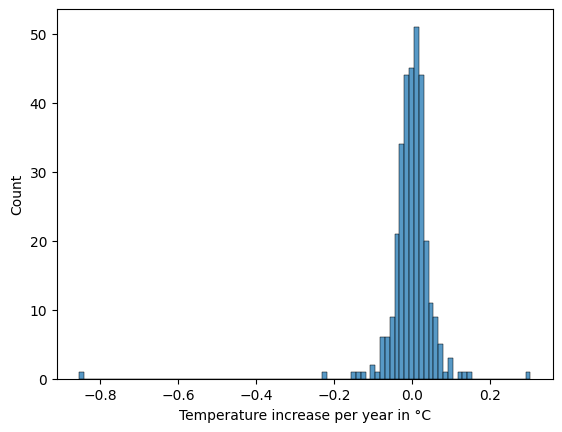

In [42]:
ax = sns.histplot(data=temp_increase_df, x=temp_increase_arr)
ax.set_xlabel('Temperature increase per year in °C')

import matplotlib.pyplot as plt
plt.show()

The one outlier at -0.8°C makes the histogram hard to read. We could remove it, however, since we take all cities, and the recording of the temperature is done at different periods, the removal is not that necessary right now.

Let's limit the view to [-0.25,0.25]:

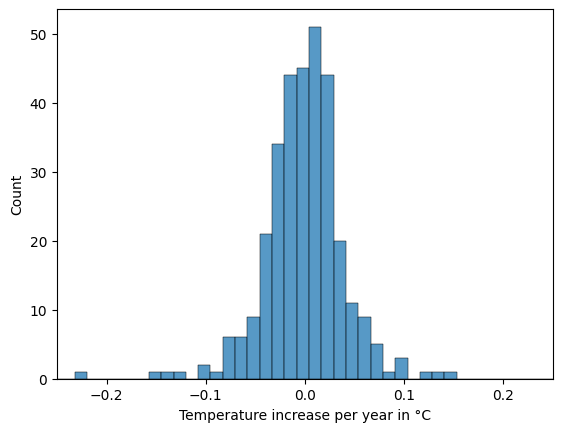

In [43]:
fig, ax = plt.subplots()
sns.histplot(data=temp_increase_arr)
ax.set_xlim(-0.25, 0.25)
ax.set_xlabel('Temperature increase per year in °C')
plt.show()

In [44]:
print("Average temperature increase:", temp_increase_arr.mean())
print("Median of temperature increases:", np.median(temp_increase_arr))

Average temperature increase: -0.002647236982209757
Median of temperature increases: 0.0011657322379258833


We do not see any temperature increases on average (A value of -0.002 is neglible). Also, the median also tells us that there is not any significant increase. 

However, just using these results are misleading, simply because the data is inconsistent: We do not know for each city, when the data starts. If registering data starts in autumn, and ends in a year in the winter season, then the data is biased because we have every season appears equally expect for the winter season, which appears once more than the other season, and therefore the average temperature is then expected to be lower than it actually should.

Now, let's try checking the temperature increase starting from 2010. Also, since the last year recorded is 2020, but the last record is in May, we will remove 2020 - that takes the imbalance of different seasons into account. To get consistent data, we only include the temperature changes of city that are fully recorded in this aforementioned period:

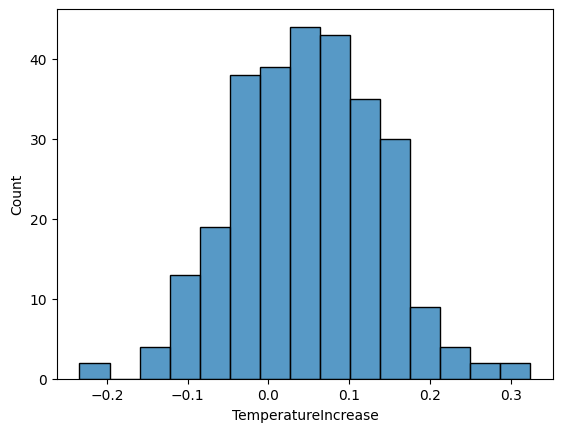

In [45]:
temp_increase_lst = []
for city in data['City'].unique():
    data_city = data[(data.City == city) & (data.DateTime >= pd.Timestamp(2010,1,1)) & (data.DateTime <= pd.Timestamp(2019,12,31))]
    
    if not data_city.empty and data_city.iloc[0].DateTime == pd.Timestamp(2010,1,1) and data_city.iloc[-1].DateTime == pd.Timestamp(2019,12,31):
        data_city = data_city.drop(['Region','Country','State','City'], axis=1)

        data_city.loc[:, 'DateTime'] = data['DateTime'].dt.to_period('Y')
        data_city = data_city.groupby('DateTime', as_index=False).mean()
        data_city['DateTime'] = data_city['DateTime'].astype(str)
        data_city['DateTime'] = pd.to_datetime(data_city['DateTime'])
        X = (data_city['DateTime'].dt.to_period('Y').apply(pd.to_numeric) + 1970).values.reshape(-1, 1)
        y = data_city['AvgTemperatureCelsius'].values
        linear_regressor = LinearRegression()
        linear_regressor.fit(X, y)
        temp_increase_lst.append(linear_regressor.coef_[0])
        # print("The average temperature per year is increasing by", str(linear_regressor.coef_[0])[:5], "degrees in", str(city), "!")
    else:
        temp_increase_lst.append(np.nan)
        # print("Skipped", str(city), "due to not having enough data!")
        
temp_increase_df = pd.DataFrame({'City': data['City'].unique(), 'TemperatureIncrease': np.array(temp_increase_lst)})
ax = sns.histplot(data=temp_increase_df['TemperatureIncrease'])
ax.set_label('Average temperature increase in °C')

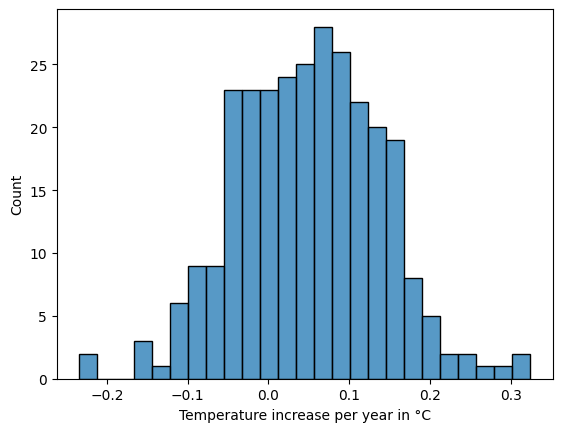

In [46]:
ax = sns.histplot(data=temp_increase_df['TemperatureIncrease'], bins=25)
ax.set_xlabel('Temperature increase per year in °C')
plt.show()

In [47]:
print("Average temperature increase from 2010 to 2019:\t\t", temp_increase_df['TemperatureIncrease'].mean().round(5))
print("Median of temperature increases from 2010 to 2019:\t", temp_increase_df['TemperatureIncrease'].median().round(5))

Average temperature increase from 2010 to 2019:		 0.04906
Median of temperature increases from 2010 to 2019:	 0.0519


Now let's see how the temperature increases when grouping by the region (=continent).

In [48]:
temp_increase_by_region_df = data.drop(['Country','State','AvgTemperatureCelsius','DateTime'],axis=1).drop_duplicates(keep='last').set_index('City').join(temp_increase_df.set_index('City')).groupby('Region').mean().reset_index()
temp_increase_by_region_df

,Region,TemperatureIncrease
0,Africa,0.031072
1,Asia,0.077576
2,Australia/South Pacific,0.068949
3,Europe,0.122132
4,Middle East,0.063341
5,North America,0.029056
6,South/Central America & Carribean,0.025951


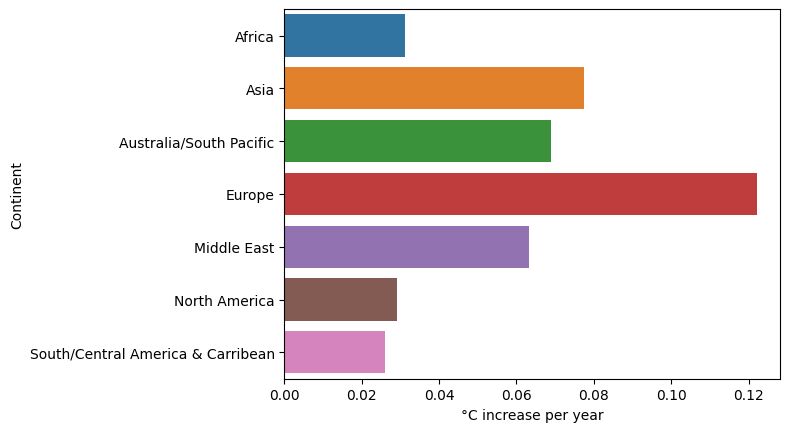

In [49]:
ax = sns.barplot(data=temp_increase_by_region_df, y='Region', x='TemperatureIncrease')
ax.set(xlabel='°C increase per year', ylabel='Continent')
plt.show()

Europe is the contintent which is by far the most affected by the temperature increase, than other contintents. We can also observe, that by grouping per region, that every region has a temperature increase. So, although in some cities, the temperature does not significantly increase, but on a grand scale, the increase is visible.

Compare this to the temperature increase from 1995 to 2005:

The average temperature per year is increasing by 0.011 degrees in Abidjan !
The average temperature per year is increasing by 0.029 degrees in Abilene !
The average temperature per year is increasing by 0.058 degrees in Abu Dhabi !
The average temperature per year is increasing by 0.008 degrees in Addis Ababa !
The average temperature per year is increasing by 0.070 degrees in Akron Canton !
The average temperature per year is increasing by 0.043 degrees in Albany !
The average temperature per year is increasing by 0.022 degrees in Albuquerque !
The average temperature per year is increasing by 0.016 degrees in Algiers !
The average temperature per year is increasing by 0.054 degrees in Allentown !
The average temperature per year is increasing by 0.075 degrees in Almaty !
The average temperature per year is increasing by 0.043 degrees in Amarillo !
The average temperature per year is increasing by 0.050 degrees in Amman !
The average temperature per year is increasing by 0.038 degree

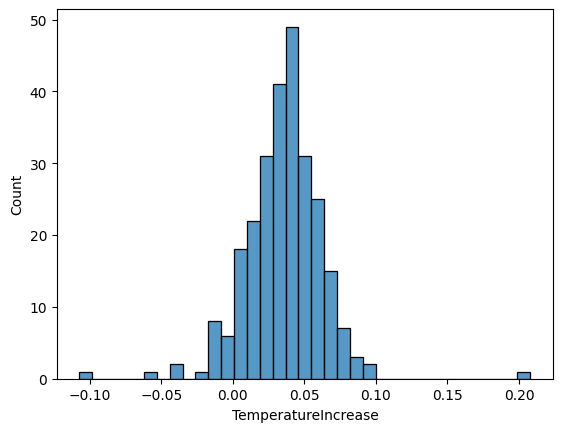

In [50]:
temp_increase_lst = []
for city in data['City'].unique():
    data_city = data[(data.City == city) & (data.DateTime >= pd.Timestamp(1995,1,1)) & (data.DateTime <= pd.Timestamp(2019,12,31))]
    
    if not data_city.empty and data_city.iloc[0].DateTime == pd.Timestamp(1995,1,1) and data_city.iloc[-1].DateTime == pd.Timestamp(2019,12,31):
        data_city = data_city.drop(['Region','Country','State','City'], axis=1)

        data_city.loc[:, 'DateTime'] = data['DateTime'].dt.to_period('Y')
        data_city = data_city.groupby('DateTime', as_index=False).mean()
        data_city['DateTime'] = data_city['DateTime'].astype(str)
        data_city['DateTime'] = pd.to_datetime(data_city['DateTime'])
        X = (data_city['DateTime'].dt.to_period('Y').apply(pd.to_numeric) + 1970).values.reshape(-1, 1)
        y = data_city['AvgTemperatureCelsius'].values
        linear_regressor = LinearRegression()
        linear_regressor.fit(X, y)
        temp_increase_lst.append(linear_regressor.coef_[0])
        print("The average temperature per year is increasing by", str(linear_regressor.coef_[0])[:5], "degrees in", str(city), "!")
    else:
        temp_increase_lst.append(np.nan)
        print("Skipped", str(city), "due to not having enough data!")
        
temp_increase_old_df = pd.DataFrame({'City': data['City'].unique(), 'TemperatureIncrease': np.array(temp_increase_lst)})
ax = sns.histplot(data=temp_increase_old_df['TemperatureIncrease'])
ax.set_label('Average temperature increase in °C')

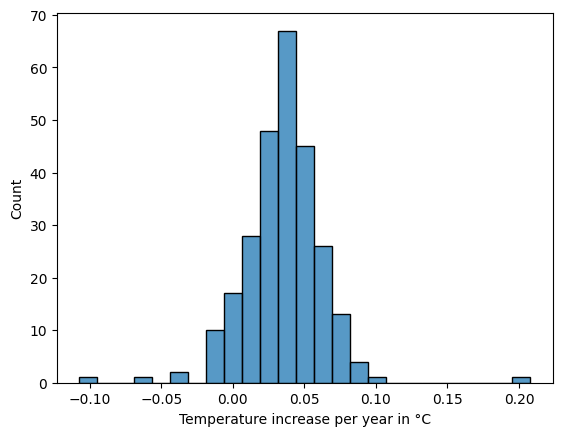

In [51]:
ax = sns.histplot(data=temp_increase_old_df['TemperatureIncrease'], bins=25)
ax.set_xlabel('Temperature increase per year in °C')
plt.show()

In [52]:
print("Average temperature increase from 1995 to 2005:\t\t", temp_increase_old_df['TemperatureIncrease'].mean().round(5))
print("Median of temperature increases from 1995 to 2005:\t", temp_increase_old_df['TemperatureIncrease'].median().round(5))

Average temperature increase from 1995 to 2005:		 0.03536
Median of temperature increases from 1995 to 2005:	 0.03701


In [53]:
temp_increase_by_region_old_df = data.drop(['Country','State','AvgTemperatureCelsius','DateTime'],axis=1).drop_duplicates(keep='last').set_index('City').join(temp_increase_old_df.set_index('City')).groupby('Region').mean().reset_index()
temp_increase_by_region_old_df

,Region,TemperatureIncrease
0,Africa,0.014421
1,Asia,0.027920
2,Australia/South Pacific,0.035856
3,Europe,0.044503
4,Middle East,0.061586
5,North America,0.036728
6,South/Central America & Carribean,0.022103


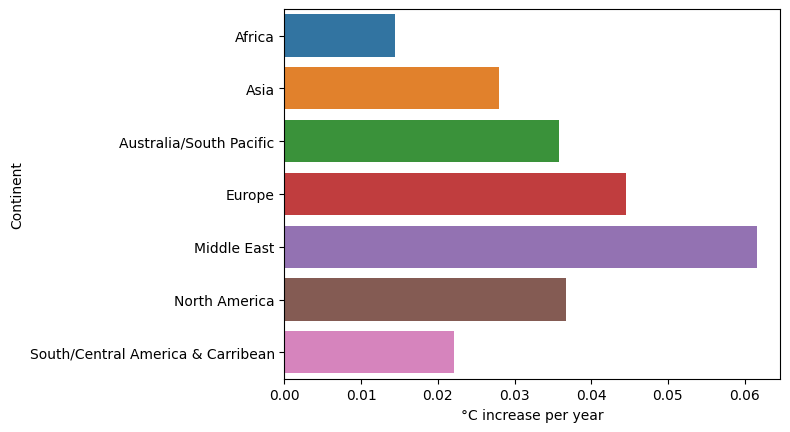

In [54]:
ax = sns.barplot(data=temp_increase_by_region_old_df, y='Region', x='TemperatureIncrease')
ax.set(xlabel='°C increase per year', ylabel='Continent')
plt.show()

Now compare both periods:

<AxesSubplot:xlabel='TemperatureIncrease', ylabel='Region'>

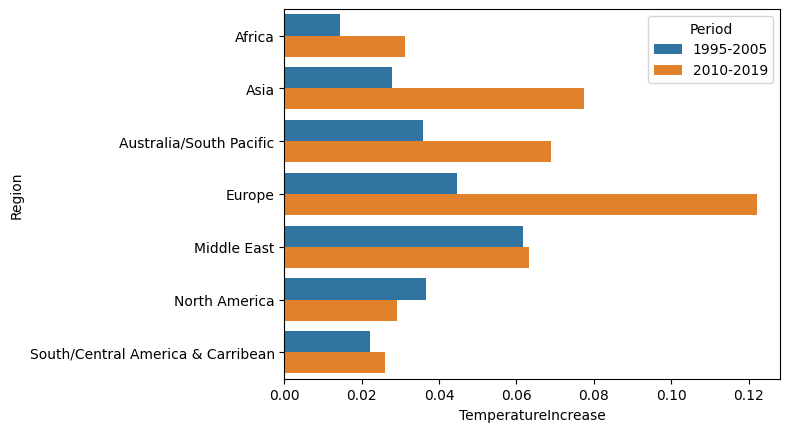

In [55]:
temp_increase_by_region_old_df['Period'] = '1995-2005'
temp_increase_by_region_df['Period'] = '2010-2019'

compare_temp_increase_by_region_df = pd.concat([temp_increase_by_region_old_df, temp_increase_by_region_df])
sns.barplot(data=compare_temp_increase_by_region_df, y='Region', x='TemperatureIncrease', hue='Period')

Expect for North America, where the temperature increase goes down a small amount (but the temperature increase is still positive!), there is a worringly high temperature increase in Africa, Australia and especially Asia and Europe.

# Model Building

WIP